# **Text Processing**

## **Word Tokenization**

Tokenization is the process of segmenting a string of characters into words.

In [ ]:
## Simle tokenization use str.split() method
sentence = "Thomas Jefferson began building Monticello at the age of 26."
sentence.split()

['Thomas',
 'Jefferson',
 'began',
 'building',
 'Monticello',
 'at',
 'the',
 'age',
 'of',
 '26.']

In [ ]:
## Tokenization using regular expressions

import re
sentence = "Thomas Jefferson began building Monticello at the age of 26."

tokens = re.split(r"[-\s.,;!?]+", sentence)

tokens

['Thomas',
 'Jefferson',
 'began',
 'building',
 'Monticello',
 'at',
 'the',
 'age',
 'of',
 '26',
 '']

In [ ]:
# To filter out the whitespace and punctuation characters

tokens_cleaned = [x for x in tokens if x not in "- \t\n.,;!?"]

tokens_cleaned

['Thomas',
 'Jefferson',
 'began',
 'building',
 'Monticello',
 'at',
 'the',
 'age',
 'of',
 '26']

 ## **Lemmatization** **and Stemming**

 Stemming is a technique to identify common words, or even various verb forms. 
 

In [ ]:

import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
# Wordnet is a large lexical database of English Words. Nouns, verbs, adjectives,
# and adverbs are grouped together into sets of cognitive synonyms called 'sysnets',
# each expressing a distinct concept.
# Sysnets are interlinked using conceptual-semantic and lexical relations such as homonymy and antonymy.


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize("better", pos='a')


'good'

In [ ]:
## A simple stemming implementation which can handle trailing S's and ing.....

def stem(phrase):

  return ' '.join([re.findall("^(.*ss|.*?)(s|(ing))?$", word)[0][0].strip("'") for word in phrase.lower().split()])


In [ ]:
stem("plays"), stem("playing")

('play', 'play')

In [ ]:
## Stemming using Porter Stemmer

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

' '.join([stemmer.stem(word).strip("'") for word in "dish washer's washed dishes".split()])

'dish washer wash dish'

## **Regular Expression**

In [ ]:
import re
r = "(hi|hello|hey|hola)[ ]* ([a-z]*)"
re.match(r, "Hello Rosa", flags=re.IGNORECASE)

<re.Match object; span=(0, 10), match='Hello Rosa'>

## **Zipf's Law**

In [ ]:
## Zipf's  Law
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [ ]:
from nltk.corpus import brown
# Brown Corpus has about 1 million tokens
brown.words()[:10]

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of']

In [ ]:
from collections import Counter

punctuations = set((',', '.', '--', '-', '!', '?', ':', ';', '``', "''", '(', ')', '[', ']'))
word_list = (x.lower() for x in brown.words() if x not in punctuations)

token_counts = Counter(word_list)
token_counts.most_common(20)

#If we take a look at the word frequencies in the Brown Corpus, it follows the logarithmic relationship Zipf predicted.
#'The'(rank 1 in term frequency) occurs roughly twice as often as 'of'(rank 2 in term frequency).""

[('the', 69971),
 ('of', 36412),
 ('and', 28853),
 ('to', 26158),
 ('a', 23195),
 ('in', 21337),
 ('that', 10594),
 ('is', 10109),
 ('was', 9815),
 ('he', 9548),
 ('for', 9489),
 ('it', 8760),
 ('with', 7289),
 ('as', 7253),
 ('his', 6996),
 ('on', 6741),
 ('be', 6377),
 ('at', 5372),
 ('by', 5306),
 ('i', 5164)]

Text(0.5, 1.0, 'Frequency of n-th most frequent word and 1/n line.')

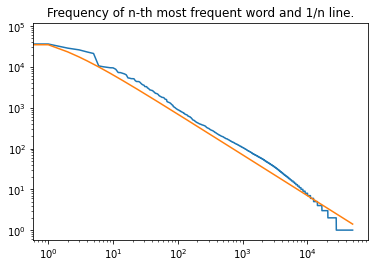

In [ ]:
 ## plot showing Zipf's Law
import matplotlib.pyplot as plt

M = token_counts['the']

plt.loglog([c for (w, c) in token_counts.most_common()])
plt.loglog([M/i for i in range(1, len(token_counts) + 1)])
plt.title("Frequency of n-th most frequent word and 1/n line.")

## **A Simple Spelling Corrector using Bag of Words Model**

In [ ]:
brown_text = ' '.join([word for word in brown.words()]) ## using the Brown corpus
len(brown_text.split())

1161192

In [ ]:
import re
from collections import Counter

punctuations = set((',', '.', '--', '-', '!', '?', ':', ';', '``', "''", '(', ')', '[', ']'))
# word_list = (x.lower() for x in brown.words() if x not in punctuations]


def words(text):
  return re.findall(r'\w+', text.lower())


token_counts = Counter(words(brown_text))


def P(word, N=sum(token_counts.values())):
  """Probability of word"""
  return token_counts[word] / N

def correction(word):
  """Most probable spelling correction for word"""
  return max(candidates(word), key=P)

def candidates(word):
  """Possible corrections for word"""
  return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words):
  """The subset of 'words' that appear in the dictionary of token_counts"""
  return set(w for w in words if w in token_counts)

def edits1(word):
  """All edits that are one edit away from 'word'"""
  letters = 'abcdefghijklmnopqrstuvwxyz'
  splits = [(word[:i], word[i:]) for i in range(len(word) + 1)]
  deletes = [L + R[1:] for L, R in splits if R ]
  transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
  replaces = [L + c + R[1:] for L, R in splits if R for c in letters ]
  inserts = [L + c + R for L, R in splits for c in letters]
  return set(deletes + transposes + replaces + inserts)

def edits2(word):
  """All the edits are two edits away from word"""
  return (e2 for e1 in edits1(word) for e2 in edits1(e1))


In [ ]:
correction('speling')

'spelling'

In [ ]:
correction('korrectud')

'corrected'

## **Working of Spelling Corrector** Function correction(word) tries to choose the most likely correction for w. We try to find the correction c, out of all possible candidates, that maximizes the probability that c is the intended correction, given the original word.

### **Candidate Model :** A simple edit to a word is deletion(remove one letter), a transposition(swap two adjacent letters), a replacement(change one letter to another) or an insertion(add a letter). The function edits1(word) returns a set of all the edited strings(whether words or not) that can be made with one simple edit. 

### For a word of length n, there will be n deletions, n-1 transpositions, 26n alterations, and 26(n+1) insertions, for a total of 54n+25. 




In [ ]:
len(edits1('somthing'))

442

In [ ]:
def known(words): return set(w for w in words if w in token_counts)

known(edits1('somthing'))

{'something', 'soothing'}

In [ ]:
def edits2(word): return (e2 for e1 in edits1(word) for e2 in edits1(e1))

len(set(edits2('somthing')))

90902

In [ ]:
known(edits2('something'))

{'smoothing', 'somethin', 'something', 'soothing'}

In [ ]:
edits1('wird')

<table>
  <tr>
    <th> 

 ### **Language Model**

We estimate the probability of a word, P(word), by counting the number of times each word appears in the corpus. The function words breaks text into words, the the variable token_counts holds a Counter of how often each word appears, and P estimates the probability of each word, based on this Counter. 

In [ ]:
len(token_counts)

42432

In [ ]:
sum(token_counts.values())

1033893

In [ ]:
token_counts.most_common(10)

[('the', 70003),
 ('of', 36473),
 ('and', 28935),
 ('to', 26247),
 ('a', 23502),
 ('in', 21422),
 ('that', 10789),
 ('is', 10109),
 ('was', 9815),
 ('he', 9801)]

In [ ]:
max(token_counts, key=P)

'the'

In [ ]:
P("the")

0.06770816709272623

In [ ]:
P("extermination")

9.672180776927593e-07

In [ ]:
P("vefend") # as the word 'vefend' doesn't exist in the corpus, we get a probability = 0

0.0

 ### **Evaluating our spell corrector**

In [ ]:
def correct_text(text):
  """Correct all the words within a text, returning the corrected text"""
  return re.sub('[a-zA-Z]+', correct_match, text)

def correct_match(match):
  """Spell-correct word in match, and preserve proper upper/lower/title case"""
  word = match.group()
  return case_of(word)(correction(word.lower()))

def case_of(text):
  """Return the case function appropriate for text"""
  return (str.upper if text.isupper() else
          str.lower if text.islower() else
          str.title if text.istitle() else
          str)

In [ ]:
correct_text('Speling Errurs IN somethink. Whutever; unusuel misteakes?')

'Spelling Errors IN something. Whatever; unusual mistakes?'

In [ ]:
correct_text("He saed that it's not goinng to worl") 
## the spelling corrector corrects the sentence word by word.

"He said that it's not going to world"

In [ ]:
# Question 1: Show Zipf's law using Gutenberg Corpus? (download the Gutenberg Corpus using nltk)

# Question 2: Perform word tokenization on string 
              #"Let’s go and meet Mr. Takashi, one of the prominent members of N.C.A. in Japan."

# Question 3: Write a custom function to perform stemming to handle "ed" at the end of a word.

# Question 4: Remove emails from the given text using regular expressions?
text = '''Dave Martin
615-555-7164
173 Main St., Springfield RI 55924
davemartin@gmail.com
Charles Harris
800-555-5669
969 High St., Atlantis VA 34075
charlesharris@bogusemail.com
Eric Williams
560-555-5153
806 1st St., Faketown AK 86847
laurawilliams@outlook.com'''